In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('../')
from CEmulator.Emulator import HMF_CEmulator

Omegab =  0.04897468
Omegam =  0.30969282 # exclude Omega_nu
H0     =  67.66000000
ns     =  0.96650000
As     =  2.10500000*1e-9
w      =  -1.00000000
wa     =  0.00000000
mnu    =  0.06000000

csstemu = HMF_CEmulator(verbose=True)
csstemu.set_cosmos(Omegab=Omegab, Omegac=Omegam-Omegab, H0=H0, ns=ns, w=w, wa=wa, mnu=mnu, As=As)
print(csstemu.get_sigma8(), csstemu.get_sigma8_cb())
zlists  = (1/np.loadtxt('../../zs_list12.txt') - 1 )[::-1]


Loading the PkcbLin emulator...
Using 513 training samples.
Loading the PknnLin emulator...
Using 512 training samples [remove c0001 (no massive neutrino)].
The neutrino mass is treated as a single massive component.
Loading the hmf_rockstar_M200m emulator...
Using 129 training samples.
Loading the hmf_fof_M200c emulator...
Using 129 training samples.
Loading the hmf_rockstar_Mvir emulator...
Using 129 training samples.
0.8100516787897775 0.8135406637497443


# Nbin = 30

In [3]:
m_edges = np.logspace(10, 16, 30)
dlgM    = np.log10(m_edges[1]) - np.log10(m_edges[0])
dlnM    = np.log(m_edges[1]) - np.log(m_edges[0])
mcen    = 10**((np.log10(m_edges[1:]) + np.log10(m_edges[:-1]))/2)
%time Nhalo   = csstemu.get_Nhalo(z=zlists, M=m_edges, V=1e9)
print(Nhalo.shape)
%time dndlnM  = csstemu.get_dndlnM(z=zlists, M=mcen)
print(dndlnM.shape)

CPU times: user 329 ms, sys: 821 µs, total: 330 ms
Wall time: 330 ms
(12, 30)
CPU times: user 334 ms, sys: 678 µs, total: 335 ms
Wall time: 335 ms
(12, 29)


In [4]:
hmfsimu  = np.zeros((len(zlists), len(mcen)))
for iz in range(12):
    fbase    = "/home/cossim/yuyu22/chenzhao/csst/simulation/c0000/output/powerspecs/hmf_group_%03d_rockstar.txt"%(11-iz)
    if iz == 0:
        print(np.loadtxt(fbase, max_rows=1, dtype=str, comments='&'))
    hmfsimu[iz] = np.loadtxt(fbase)[:,4]
print(hmfsimu.shape)

['#' 'Mcen' '\\t' 'Mvir' '\\t' 'GroupMass' '\\t' 'M200c' '\\t' 'M200m'
 '\\t' 'M200m_corr']
(12, 29)


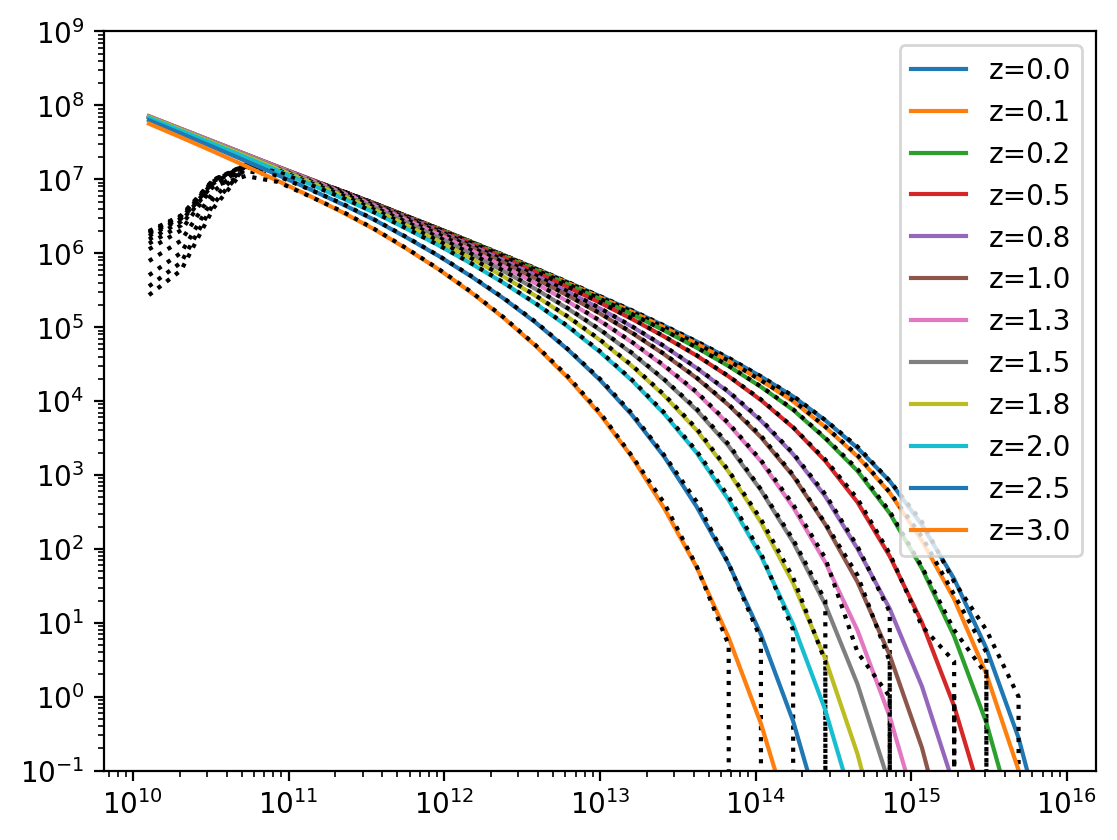

In [5]:
for iz in range(len(zlists)):
    plt.plot(mcen, dndlnM[iz]*1e9*dlnM, label='z=%.1f'%zlists[iz])
    plt.plot(mcen, hmfsimu[iz], 'k:')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim(1e-1, 1e9);

/tmp/ipykernel_814133/4227669252.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(mcen, Nhalo[iz][:-1]/cumhmf[iz], label='z=%.1f'%zlists[iz])
/tmp/ipykernel_814133/4227669252.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(mcen, Nhalo[iz][:-1]/cumhmf[iz], label='z=%.1f'%zlists[iz])


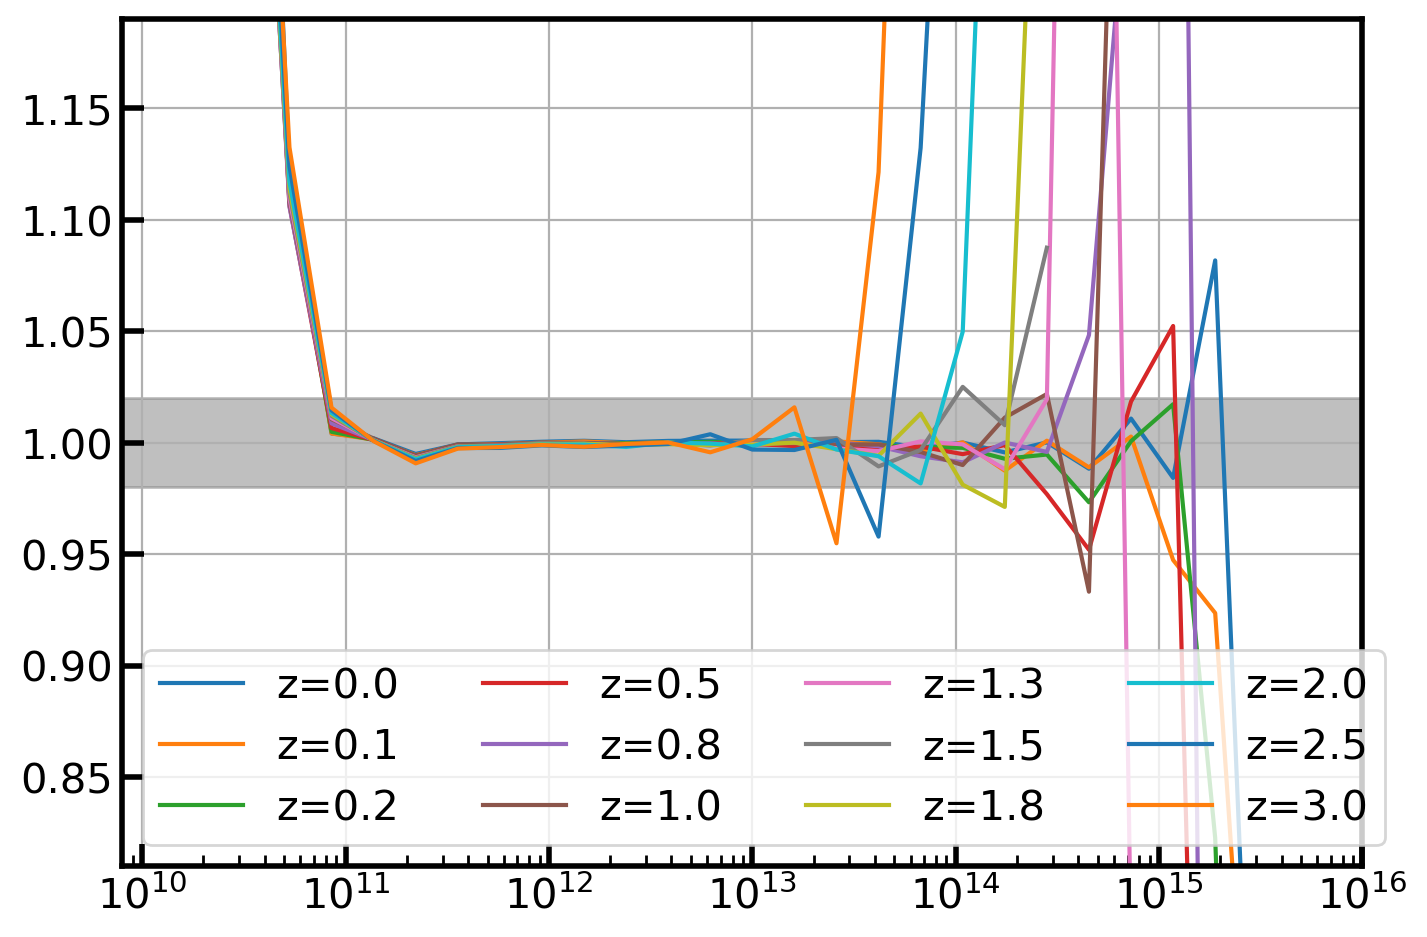

In [6]:
cumhmf = np.cumsum(hmfsimu[:,::-1], axis=1)[:,::-1]
with plt.style.context('article'):
    xlims = [8e9, 1e16]
    for iz in range(len(zlists)):
        plt.plot(mcen, Nhalo[iz][:-1]/cumhmf[iz], label='z=%.1f'%zlists[iz])
    plt.xscale('log')
    # plt.yscale('log')
    plt.legend(ncol=4)
    plt.ylim(0.81, 1.19)
    plt.xlim(xlims)
    plt.fill_between(xlims, 0.98, 1.02, color='gray', alpha=0.5)
# plt.ylim(1e-1, 1e9);

# Nbin = 60

In [7]:
m_edges = np.logspace(10, 16, 60+1)
dlgM    = np.log10(m_edges[1]) - np.log10(m_edges[0])
dlnM    = np.log(m_edges[1]) - np.log(m_edges[0])
mcen    = 10**((np.log10(m_edges[1:]) + np.log10(m_edges[:-1]))/2)
%time Nhalo   = csstemu.get_Nhalo(z=zlists, M=m_edges, V=1e9)
print(Nhalo.shape)
%time dndlnM  = csstemu.get_dndlnM(z=zlists, M=mcen)
print(dndlnM.shape)

hmfsimu  = np.zeros((len(zlists), len(mcen)))
for iz in range(12):
    fbase    = "/home/cossim/yuyu22/chenzhao/csst/simulation/c0000/output/powerspecs/hmf_group_%03d_rockstar_Nbin60.txt"%(11-iz)
    if iz == 0:
        print(np.loadtxt(fbase, max_rows=1, dtype=str, comments='&'))
    hmfsimu[iz] = np.loadtxt(fbase)[:,4] * dlgM * 1e9
print(hmfsimu.shape)

CPU times: user 330 ms, sys: 856 µs, total: 331 ms
Wall time: 330 ms
(12, 61)
CPU times: user 331 ms, sys: 500 µs, total: 331 ms
Wall time: 332 ms
(12, 60)
['#' 'Mcen' '\\t' 'Mvir' '\\t' 'GroupMass' '\\t' 'M200c' '\\t' 'M200m'
 '\\t' 'M200m_corr' '\\t' 'Mvir_all' '\\t' 'M500c' '\\t' 'M2500c']
(12, 60)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


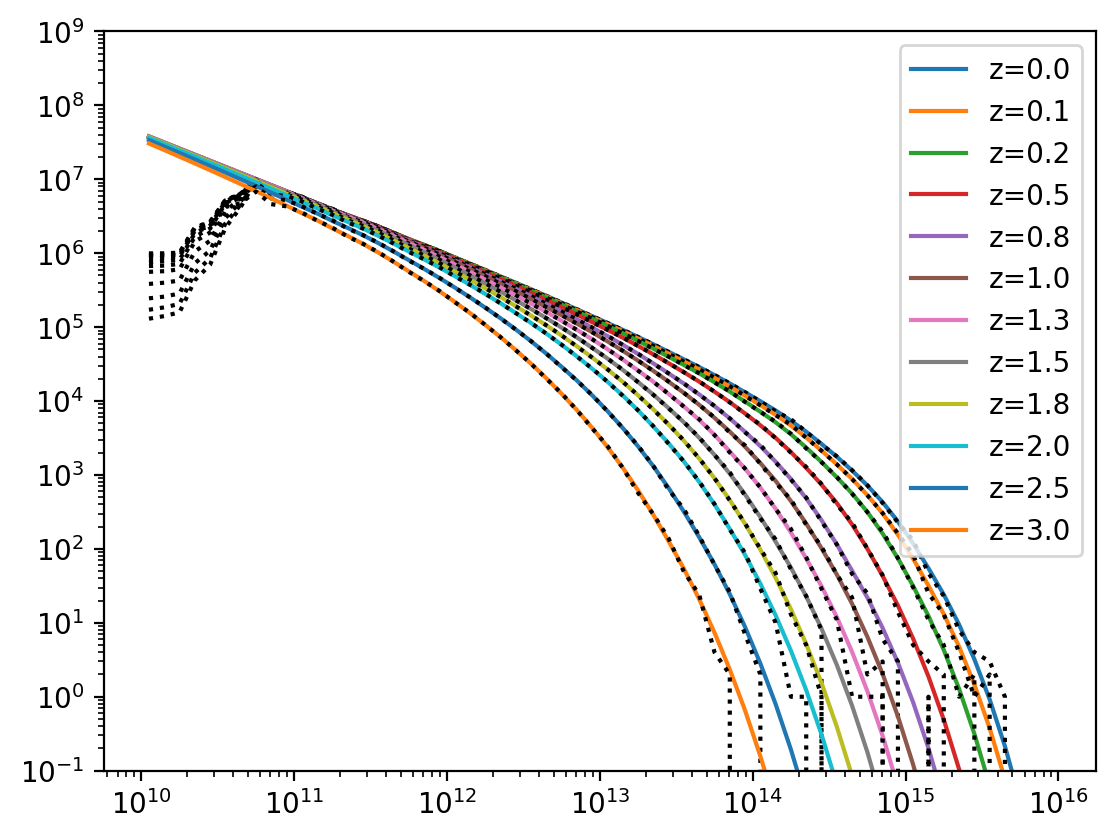

In [8]:
for iz in range(len(zlists)):
    plt.plot(mcen, dndlnM[iz]*1e9*dlnM, label='z=%.1f'%zlists[iz])
    plt.plot(mcen, hmfsimu[iz], 'k:')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim(1e-1, 1e9);

/tmp/ipykernel_814133/3821724855.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(mcen, Nhalo[iz][:-1]/cumhmf[iz], label='z=%.1f'%zlists[iz])
/tmp/ipykernel_814133/3821724855.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(mcen, Nhalo[iz][:-1]/cumhmf[iz], label='z=%.1f'%zlists[iz])
/tmp/ipykernel_814133/3821724855.py:11: RuntimeWarning: divide by zero encountered in divide
  plt.fill_between(mcen, 1- 1/np.sqrt(cumhmf[11]), 1+1/np.sqrt(cumhmf[11]), color='gray', alpha=0.5)


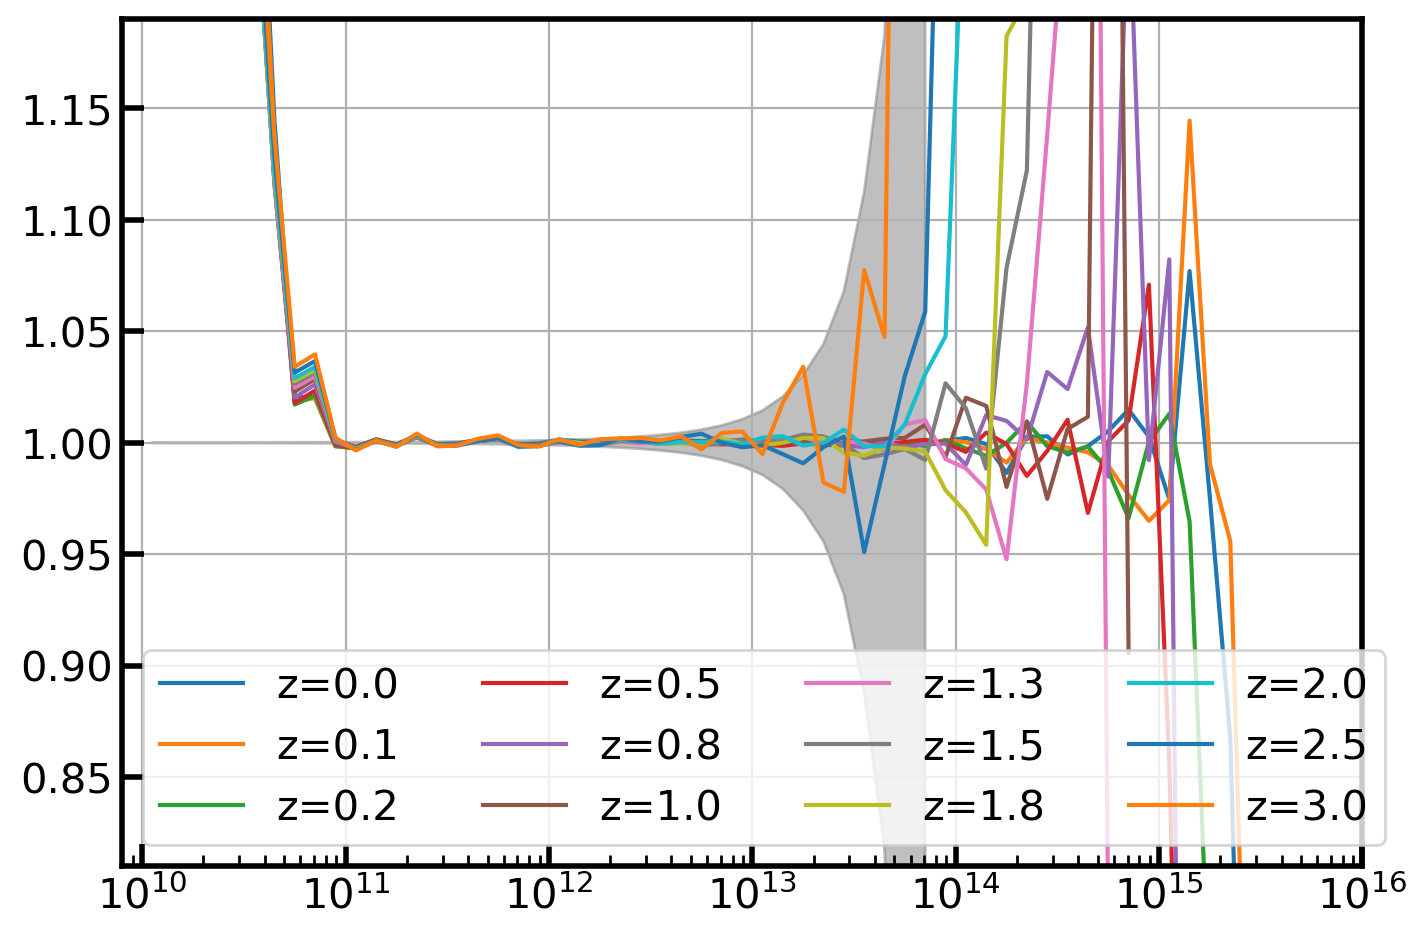

In [9]:
cumhmf = np.cumsum(hmfsimu[:,::-1], axis=1)[:,::-1]
with plt.style.context('article'):
    xlims = [8e9, 1e16]
    for iz in range(len(zlists)):
        plt.plot(mcen, Nhalo[iz][:-1]/cumhmf[iz], label='z=%.1f'%zlists[iz])
    plt.xscale('log')
    # plt.yscale('log')
    plt.legend(ncol=4)
    plt.ylim(0.81, 1.19)
    plt.xlim(xlims)
    plt.fill_between(mcen, 1- 1/np.sqrt(cumhmf[11]), 1+1/np.sqrt(cumhmf[11]), color='gray', alpha=0.5)
    # plt.fill_between(xlims, 0.98, 1.02, color='gray', alpha=0.5)
# plt.ylim(1e-1, 1e9);